In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [ ]:
from google.colab import files
upload = files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


In [ ]:
movie_df = pd.read_csv("IMDB Dataset.csv")

Exploring the data

In [ ]:
movie_df.shape

(50000, 2)

In [ ]:
movie_df.head(10)

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
5  Probably my all-time favorite movie, a story o...  positive
6  I sure would like to see a resurrection of a u...  positive
7  This show was an amazing, fresh & innovative i...  negative
8  Encouraged by the positive comments about this...  negative
9  If you like original gut wrenching laughter yo...  positive

In [ ]:
movie_df.tail(10)

review sentiment
49990  Lame, lame, lame!!! A 90-minute cringe-fest th...  negative
49991  Les Visiteurs, the first movie about the medie...  negative
49992  John Garfield plays a Marine who is blinded by...  positive
49993  Robert Colomb has two full-time jobs. He's kno...  negative
49994  This is your typical junk comedy.<br /><br />T...  negative
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

In [ ]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
movie_df.describe()

review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

In [ ]:
# Checking the null values
movie_df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
movie_df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In the dataset, there are a total of 25000 positive and 25000 negative sentimental statements

In [ ]:
# displaying a sample review from the dataset
movie_df.iloc[1].review

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

Text(0.5, 0.98, 'Sentiment Count')

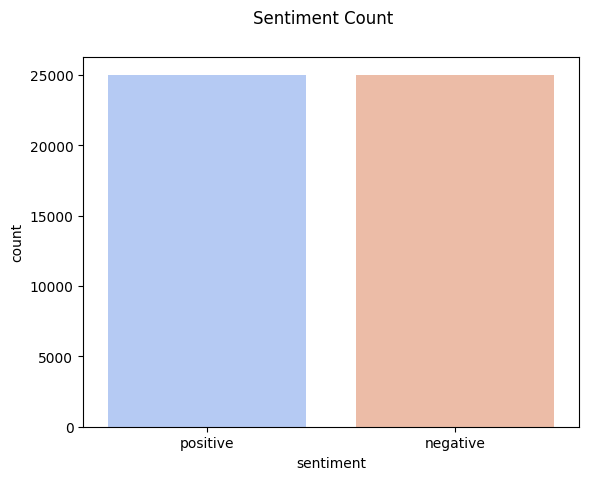

In [ ]:
# count plot to plot the number of sentiments

sns.countplot(x='sentiment', data = movie_df, palette= 'coolwarm')
plt.suptitle("Sentiment Count")

Text(0.5, 0.98, 'Sentiment Count')

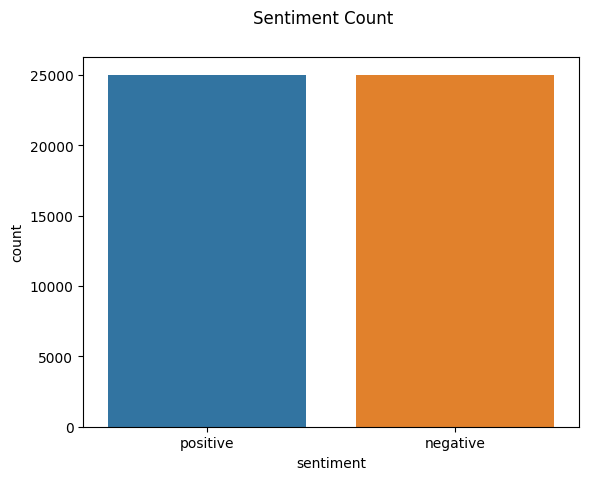

In [ ]:
# count plot to plot the number of sentiments

sns.countplot(x='sentiment', data = movie_df)
plt.suptitle("Sentiment Count")

From the above, a count plot for the number of positve and negative sentiments were shown. 

In [ ]:
# print the first 3 reviews along with its sentiment.

for i in range(3):
  print(f"Review {i} is: ")
  print()
  print(movie_df['review'].iloc[i])

Review 0 is: 

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is

In [ ]:
# find the number of word in containted in each review
def words_in_reviews(text):
    words_tokens = text.split()
    count_words_tokens = len(words_tokens)
    return count_words_tokens

In [ ]:
movie_df['number of words in each review'] = movie_df['review'].apply(words_in_reviews)

In [ ]:
movie_df.head(25)

review sentiment  \
0   One of the other reviewers has mentioned that ...  positive   
1   A wonderful little production. <br /><br />The...  positive   
2   I thought this was a wonderful way to spend ti...  positive   
3   Basically there's a family where a little boy ...  negative   
4   Petter Mattei's "Love in the Time of Money" is...  positive   
5   Probably my all-time favorite movie, a story o...  positive   
6   I sure would like to see a resurrection of a u...  positive   
7   This show was an amazing, fresh & innovative i...  negative   
8   Encouraged by the positive comments about this...  negative   
9   If you like original gut wrenching laughter yo...  positive   
10  Phil the Alien is one of those quirky films wh...  negative   
11  I saw this movie when I was about 12 when it c...  negative   
12  So im not a big fan of Boll's work but then ag...  negative   
13  The cast played Shakespeare.<br /><br />Shakes...  negative   
14  This a fantastic movie of three prisoners who ...  positive   
15  Kind of drawn in by the erotic scenes, only to...  negative   
16  Some films just simply should not be remade. T...  positive   
17  This movie made it into one of my top 10 most ...  negative   
18  I remember this film,it was the first film i h...  positive   
19  An awful film! It must have been up against so...  negative   
20  After the success of Die Hard and it's sequels...  positive   
21  I had the terrible misfortune of having to vie...  negative   
22  What an absolutely stunning movie, if you have...  positive   
23  First of all, let's get a few things straight ...  negative   
24  This was the worst movie I saw at WorldFest an...  negative   

    number of words in each review  
0                              307  
1                              162  
2                              166  
3                              138  
4                              230  
5                              119  
6                              150  
7                              174  
8                              130  
9                               33  
10                              96  
11                             180  
12                             398  
13                             117  
14                              50  
15                             140  
16                             146  
17                             228  
18                             129  
19                             133  
20                             308  
21                             180  
22                              65  
23                             332  
24                             151

# using this word count visulaizing the postive and negative words count by using histograms

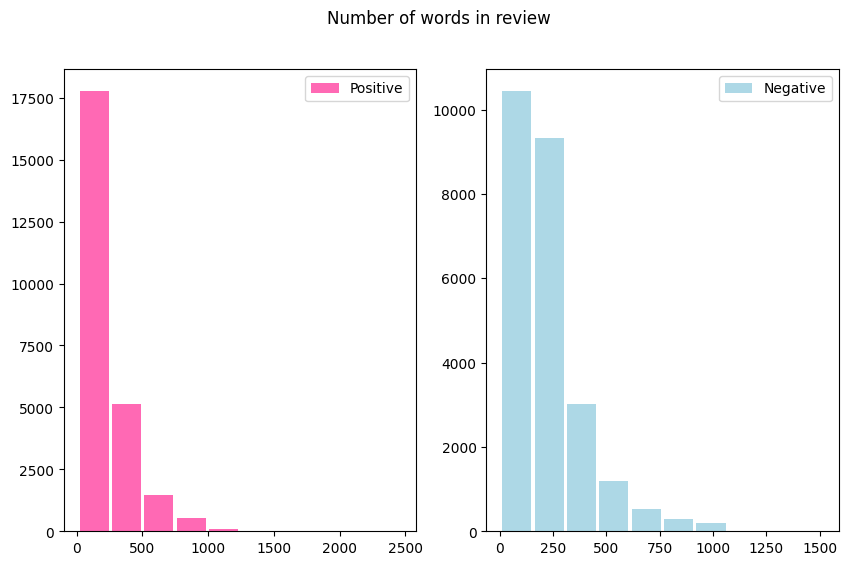

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(movie_df[movie_df['sentiment'] == 'positive']['number of words in each review'], label='Positive', color='hotpink', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(movie_df[movie_df['sentiment'] == 'negative']['number of words in each review'], label='Negative', color='lightblue', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

# Visulaizing the length of the positive and negative reviews



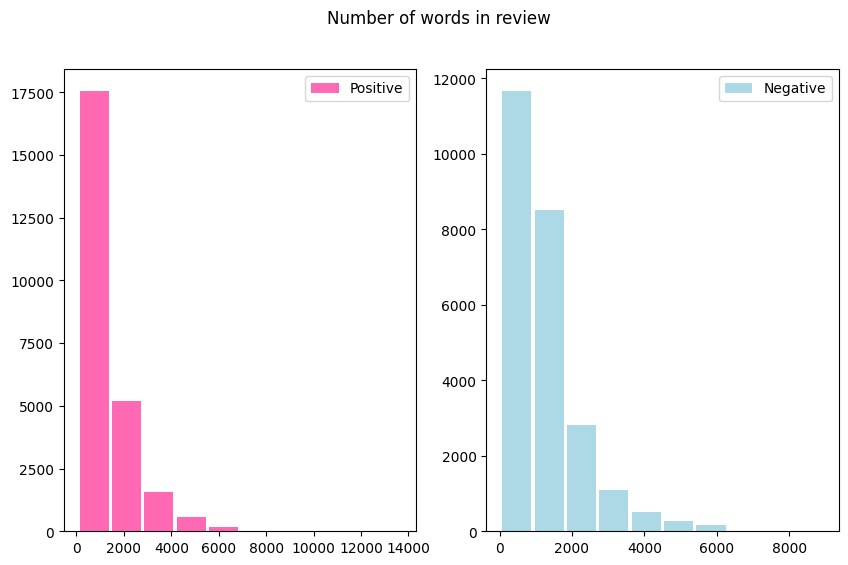

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(movie_df[movie_df['sentiment'] == 'positive']['review'].str.len(), label='Positive', color='hotpink', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(movie_df[movie_df['sentiment'] == 'negative']['review'].str.len(), label='Negative', color='lightblue', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

 converting the target column from categorical to numerical 

 positive  = 1
 negative = 0

In [ ]:
movie_df.sentiment.replace("positive", 1, inplace=True)
movie_df.sentiment.replace("negative", 0, inplace=True)

In [ ]:
movie_df.head()

review  sentiment  \
0  One of the other reviewers has mentioned that ...          1   
1  A wonderful little production. <br /><br />The...          1   
2  I thought this was a wonderful way to spend ti...          1   
3  Basically there's a family where a little boy ...          0   
4  Petter Mattei's "Love in the Time of Money" is...          1   

   number of words in each review  
0                             307  
1                             162  
2                             166  
3                             138  
4                             230

In [ ]:
# dividing the positive to visulaize them
pos_reviews =  movie_df[movie_df.sentiment == 1]
pos_reviews.head()

review  sentiment  \
0  One of the other reviewers has mentioned that ...          1   
1  A wonderful little production. <br /><br />The...          1   
2  I thought this was a wonderful way to spend ti...          1   
4  Petter Mattei's "Love in the Time of Money" is...          1   
5  Probably my all-time favorite movie, a story o...          1   

   number of words in each review  
0                             307  
1                             162  
2                             166  
4                             230  
5                             119

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

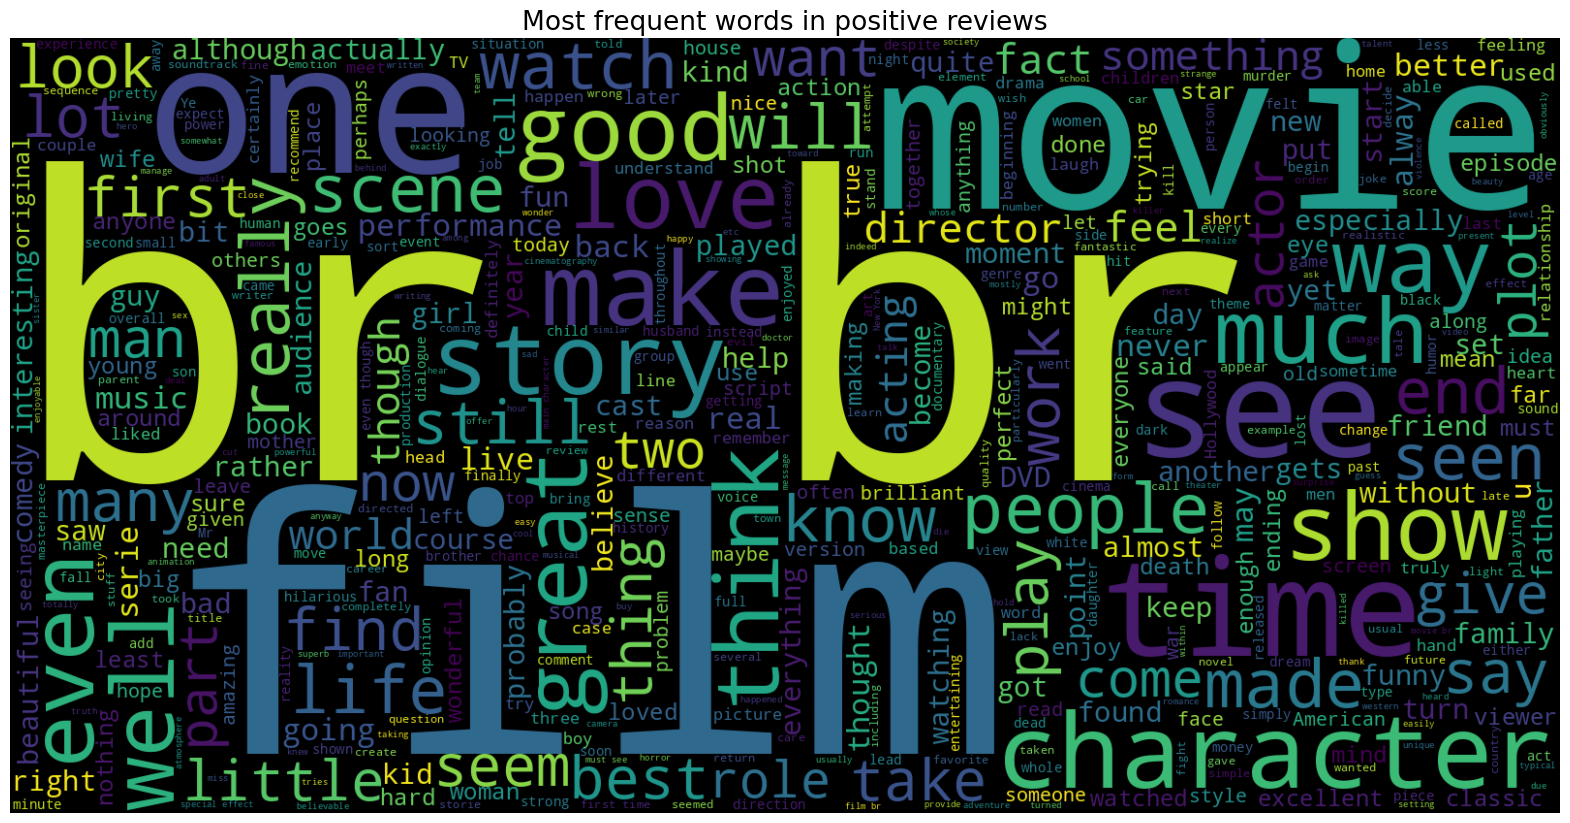

In [ ]:
# visulaizing the most frequent words in positive reviews on the original data before text processing
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [ ]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('the', 291927),
 ('and', 165943),
 ('a', 155775),
 ('of', 149178),
 ('to', 128343),
 ('is', 108168),
 ('in', 90427),
 ('that', 62449),
 ('I', 62223),
 ('it', 53378),
 ('this', 51614),
 ('/><br', 48976),
 ('as', 46574),
 ('with', 43291),
 ('was', 42155)]

In [ ]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head(15)

word   count
0     the  291927
1     and  165943
2       a  155775
3      of  149178
4      to  128343
5      is  108168
6      in   90427
7    that   62449
8       I   62223
9      it   53378
10   this   51614
11  /><br   48976
12     as   46574
13   with   43291
14    was   42155

In [ ]:
px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color= 'word')

In [ ]:

neg_reviews =  movie_df[movie_df.sentiment == 0]
neg_reviews.head()

review  sentiment  \
3   Basically there's a family where a little boy ...          0   
7   This show was an amazing, fresh & innovative i...          0   
8   Encouraged by the positive comments about this...          0   
10  Phil the Alien is one of those quirky films wh...          0   
11  I saw this movie when I was about 12 when it c...          0   

    number of words in each review  
3                              138  
7                              174  
8                              130  
10                              96  
11                             180

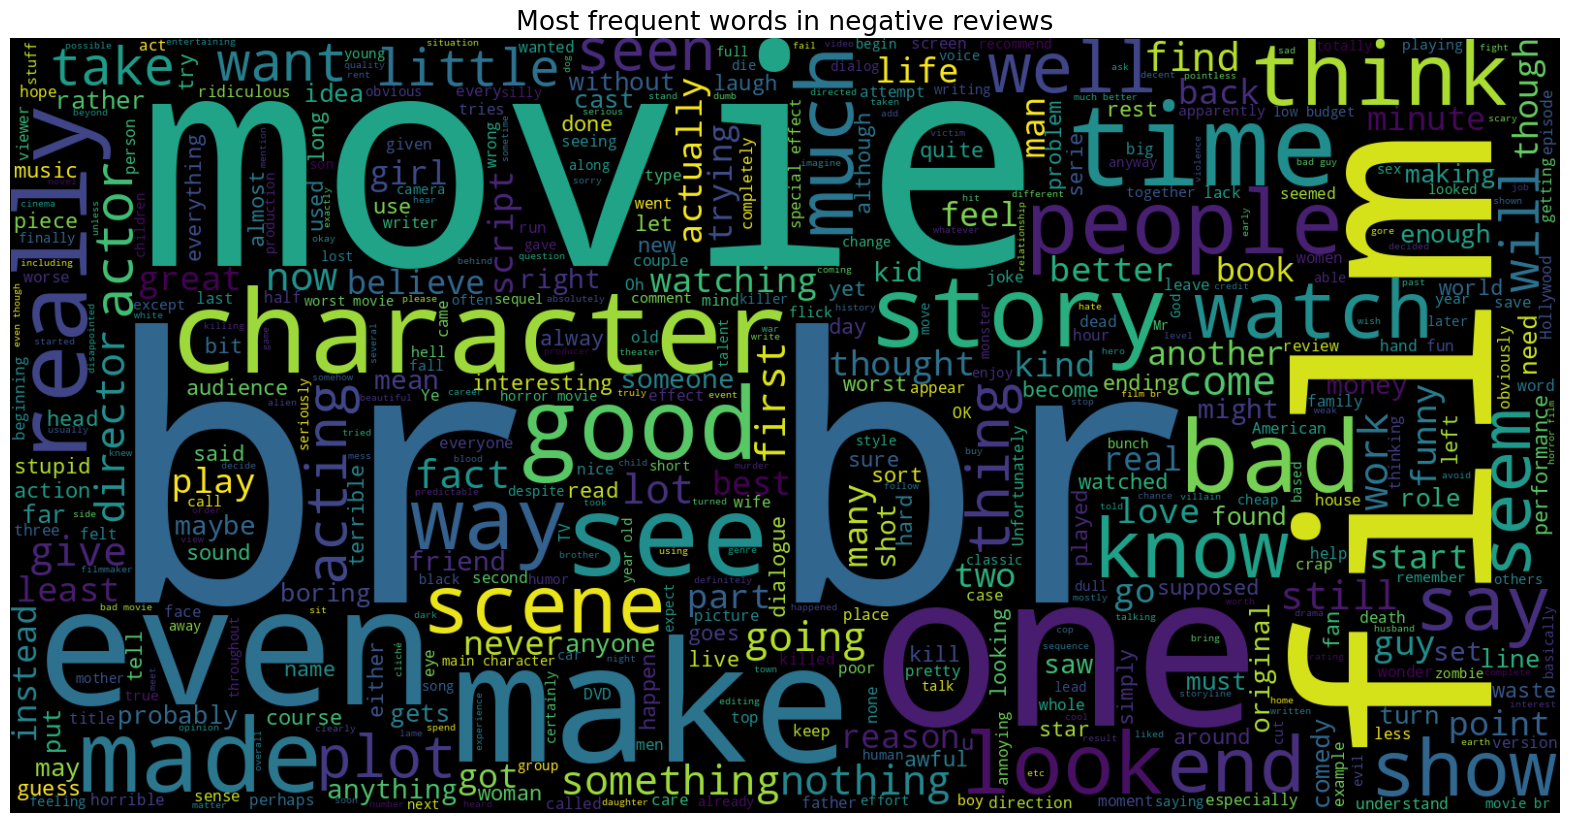

In [ ]:
# visulaizing the most frequent words in negative reviews on the original data before text processing
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [ ]:
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('the', 276808),
 ('a', 151185),
 ('and', 135976),
 ('of', 134447),
 ('to', 133507),
 ('is', 94888),
 ('in', 79554),
 ('I', 70275),
 ('that', 64369),
 ('this', 62112),
 ('it', 54538),
 ('/><br', 51998),
 ('was', 50503),
 ('for', 39843),
 ('with', 39278)]

In [ ]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head(15)

word   count
0     the  276808
1       a  151185
2     and  135976
3      of  134447
4      to  133507
5      is   94888
6      in   79554
7       I   70275
8    that   64369
9    this   62112
10     it   54538
11  /><br   51998
12    was   50503
13    for   39843
14   with   39278

In [ ]:
px.bar(neg_words, x='count', y='word', title='Common words in negative reviews', color = 'word')


<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

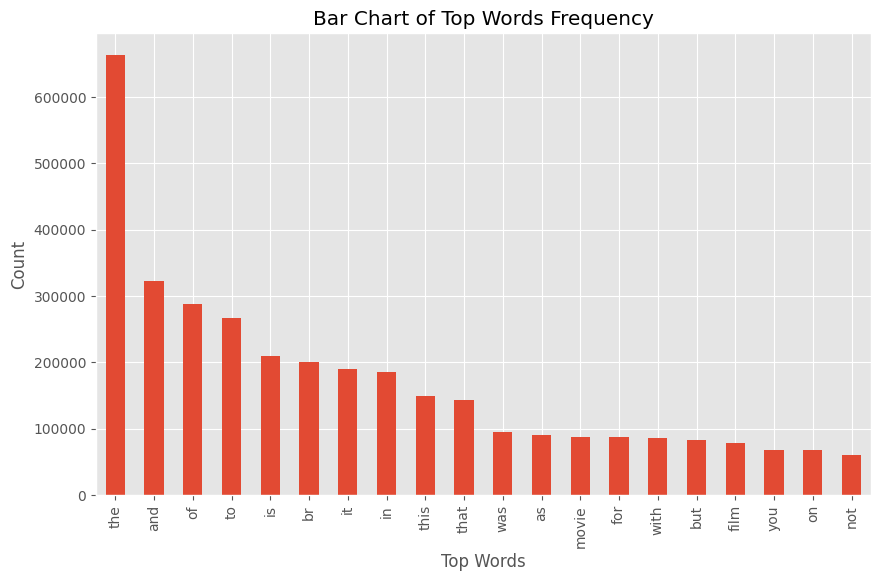

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(movie_df['review'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

### Text Processing

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
# removing HTML tags
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

strip_html_tags('<html><h2>Removing the html tags</h2></html>')

'Removing the html tags'

In [ ]:
# removing accented characters
import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

remove_accented_chars('Sómě Áccěntěd těxt')

'Some Accented text'

In [ ]:
#Contraction Mapping
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [ ]:
# Extractions
import re
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

expand_contractions("Y'all are enjoying this class we'd think")

'You all are enjoying this class we would think'

In [ ]:
# removing special charcaters
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

remove_special_characters("Well this was fun! What do you think? 123#@!", remove_digits=False)

'Well this was fun What do you think 123'

In [ ]:
# Using nltk , we want to remove the stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#Let us print the stopwords and observe what they are
set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')

In [ ]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

remove_stopwords("Let us see if we can or can not remove against the stopwords from a sentence.")

'Let us see remove stopwords sentence .'

In [ ]:
import spacy
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup

import unicodedata
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Lemmatization

# Wordnet
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

lemmatize_text("Wright State University cancels face-to-face classes for the rest of the Spring semester.")

'Wright State University cancel face - to - face class for the rest of the Spring semester .'

In [ ]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [ ]:
movie_df['clean_reviews'] = normalize_corpus(movie_df['review'])

<ipython-input-47-ff7de74b989d>:3: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.



In [ ]:
movie_df.head()

review  sentiment  \
0  One of the other reviewers has mentioned that ...          1   
1  A wonderful little production. <br /><br />The...          1   
2  I thought this was a wonderful way to spend ti...          1   
3  Basically there's a family where a little boy ...          0   
4  Petter Mattei's "Love in the Time of Money" is...          1   

   number of words in each review  \
0                             307   
1                             162   
2                             166   
3                             138   
4                             230   

                                       clean_reviews  
0  one reviewer mention watch oz episode hook rig...  
1  wonderful little production film technique una...  
2  I think wonderful way spend time hot summer we...  
3  basically family little boy jake think zombie ...  
4  petter matteis love time money visually stunni...

In [ ]:
movie_df['number of words in cleaned reviews'] = movie_df['clean_reviews'].apply(words_in_reviews)

In [ ]:
movie_df.head(10)

review  sentiment  \
0  One of the other reviewers has mentioned that ...          1   
1  A wonderful little production. <br /><br />The...          1   
2  I thought this was a wonderful way to spend ti...          1   
3  Basically there's a family where a little boy ...          0   
4  Petter Mattei's "Love in the Time of Money" is...          1   
5  Probably my all-time favorite movie, a story o...          1   
6  I sure would like to see a resurrection of a u...          1   
7  This show was an amazing, fresh & innovative i...          0   
8  Encouraged by the positive comments about this...          0   
9  If you like original gut wrenching laughter yo...          1   

   number of words in each review  \
0                             307   
1                             162   
2                             166   
3                             138   
4                             230   
5                             119   
6                             150   
7                             174   
8                             130   
9                              33   

                                       clean_reviews  \
0  one reviewer mention watch oz episode hook rig...   
1  wonderful little production film technique una...   
2  I think wonderful way spend time hot summer we...   
3  basically family little boy jake think zombie ...   
4  petter matteis love time money visually stunni...   
5  probably time favorite movie story selflessnes...   
6  I sure would like see resurrection date seahun...   
7  show amazing fresh innovative idea first air f...   
8  encourage positive comment film I look forward...   
9  like original gut wrench laughter like movie y...   

   number of words in cleaned reviews  
0                                 171  
1                                  85  
2                                  89  
3                                  66  
4                                 123  
5                                  56  
6                                  82  
7                                  84  
8                                  66  
9                                  17

In [ ]:
import pandas as pd

import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer


# download nltk corpus (first time only)
import nltk

nltk.download('all')



[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()


# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['compound'] > 0 else 0

    return sentiment




# apply get_sentiment function

movie_df['clean_sentiment_predicted'] = movie_df['clean_reviews'].apply(get_sentiment)

movie_df

clean_reviews  \
0      one reviewer mention watch oz episode hook rig...   
1      wonderful little production film technique una...   
2      I think wonderful way spend time hot summer we...   
3      basically family little boy jake think zombie ...   
4      petter matteis love time money visually stunni...   
...                                                  ...   
49995  I think movie right good job creative original...   
49996  bad plot bad dialogue bad act idiotic directin...   
49997  I catholic teach parochial elementary school n...   
49998  I go disagree previous comment side maltin one...   
49999  one expect star trek movie high art fan expect...   

       number of words in cleaned reviews  clean_sentiment predicted  \
0                                     171                          0   
1                                      85                          1   
2                                      89                          1   
3                                      66                          0   
4                                     123                          1   
...                                   ...                        ...   
49995                                  82                          1   
49996                                  59                          0   
49997                                 118                          0   
49998                                 115                          0   
49999                                  67                          1   

       clean_sentiment_predicted  
0                              0  
1                              1  
2                              1  
3                              0  
4                              1  
...                          ...  
49995                          1  
49996                          0  
49997                          0  
49998                          0  
49999                          1  

[49577 rows x 4 columns]

In [ ]:
movie_df['clean_sentiment_predicted'].value_counts()

1    34083
0    15494
Name: clean_sentiment_predicted, dtype: int64

In [ ]:
#movie_df.drop('review', axis = 1)

In [ ]:
duplicated_count = movie_df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  0


In [ ]:
#movie_df = movie_df.drop_duplicates('review')

In [ ]:
movie_df

clean_reviews  \
0      one reviewer mention watch oz episode hook rig...   
1      wonderful little production film technique una...   
2      I think wonderful way spend time hot summer we...   
3      basically family little boy jake think zombie ...   
4      petter matteis love time money visually stunni...   
...                                                  ...   
49995  I think movie right good job creative original...   
49996  bad plot bad dialogue bad act idiotic directin...   
49997  I catholic teach parochial elementary school n...   
49998  I go disagree previous comment side maltin one...   
49999  one expect star trek movie high art fan expect...   

       number of words in cleaned reviews  clean_sentiment predicted  \
0                                     171                          0   
1                                      85                          1   
2                                      89                          1   
3                                      66                          0   
4                                     123                          1   
...                                   ...                        ...   
49995                                  82                          1   
49996                                  59                          0   
49997                                 118                          0   
49998                                 115                          0   
49999                                  67                          1   

       clean_sentiment_predicted  
0                              0  
1                              1  
2                              1  
3                              0  
4                              1  
...                          ...  
49995                          1  
49996                          0  
49997                          0  
49998                          0  
49999                          1  

[49577 rows x 4 columns]

In [ ]:
movie_df = movie_df.drop_duplicates('clean_reviews')

In [ ]:
movie_df

clean_reviews  \
0      one reviewer mention watch oz episode hook rig...   
1      wonderful little production film technique una...   
2      I think wonderful way spend time hot summer we...   
3      basically family little boy jake think zombie ...   
4      petter matteis love time money visually stunni...   
...                                                  ...   
49995  I think movie right good job creative original...   
49996  bad plot bad dialogue bad act idiotic directin...   
49997  I catholic teach parochial elementary school n...   
49998  I go disagree previous comment side maltin one...   
49999  one expect star trek movie high art fan expect...   

       number of words in cleaned reviews  clean_sentiment predicted  \
0                                     171                          0   
1                                      85                          1   
2                                      89                          1   
3                                      66                          0   
4                                     123                          1   
...                                   ...                        ...   
49995                                  82                          1   
49996                                  59                          0   
49997                                 118                          0   
49998                                 115                          0   
49999                                  67                          1   

       clean_sentiment_predicted  
0                              0  
1                              1  
2                              1  
3                              0  
4                              1  
...                          ...  
49995                          1  
49996                          0  
49997                          0  
49998                          0  
49999                          1  

[49577 rows x 4 columns]

In [ ]:
movie_df = movie_df.drop('review', axis = 1)

In [ ]:
movie_df = movie_df.drop('sentiment', axis = 1)

In [ ]:
movie_df = movie_df.drop('number of words in each review', axis = 1)

In [ ]:
movie_df.head()

clean_reviews  \
0  one reviewer mention watch oz episode hook rig...   
1  wonderful little production film technique una...   
2  I think wonderful way spend time hot summer we...   
3  basically family little boy jake think zombie ...   
4  petter matteis love time money visually stunni...   

   number of words in cleaned reviews  clean_sentiment predicted  \
0                                 171                          0   
1                                  85                          1   
2                                  89                          1   
3                                  66                          0   
4                                 123                          1   

   clean_sentiment_predicted  
0                          0  
1                          1  
2                          1  
3                          0  
4                          1

In [ ]:
movie_df

clean_reviews  \
0      one reviewer mention watch oz episode hook rig...   
1      wonderful little production film technique una...   
2      I think wonderful way spend time hot summer we...   
3      basically family little boy jake think zombie ...   
4      petter matteis love time money visually stunni...   
...                                                  ...   
49995  I think movie right good job creative original...   
49996  bad plot bad dialogue bad act idiotic directin...   
49997  I catholic teach parochial elementary school n...   
49998  I go disagree previous comment side maltin one...   
49999  one expect star trek movie high art fan expect...   

       number of words in cleaned reviews  clean_sentiment predicted  \
0                                     171                          0   
1                                      85                          1   
2                                      89                          1   
3                                      66                          0   
4                                     123                          1   
...                                   ...                        ...   
49995                                  82                          1   
49996                                  59                          0   
49997                                 118                          0   
49998                                 115                          0   
49999                                  67                          1   

       clean_sentiment_predicted  
0                              0  
1                              1  
2                              1  
3                              0  
4                              1  
...                          ...  
49995                          1  
49996                          0  
49997                          0  
49998                          0  
49999                          1  

[49577 rows x 4 columns]

Finding and visualizing the most frequent  words in positive reviews

In [ ]:
positive_clean_reviews = movie_df[movie_df.clean_sentiment_predicted == 1]

In [ ]:
positive_clean_reviews.head(50)

clean_reviews  \
1   wonderful little production film technique una...   
2   I think wonderful way spend time hot summer we...   
4   petter matteis love time money visually stunni...   
5   probably time favorite movie story selflessnes...   
6   I sure would like see resurrection date seahun...   
7   show amazing fresh innovative idea first air f...   
9   like original gut wrench laughter like movie y...   
10  phil alien one quirky film humour base around ...   
11  I see movie I come I recall scary scene big bi...   
12  I big fan boll work many I enjoy movie postal ...   
13  cast play shakespeare shakespeare lost appreci...   
19  awful film must real stinker nominate golden g...   
20  success die hard sequel surprise really glut d...   
22  absolutely stunning movie hrs kill watch regre...   
23  first let get thing straight I anime fan alway...   
24  bad movie I see worldfest also receive least a...   
25  karen carpenter story show little singer karen...   
26  cell exotic masterpiece dizzying trip vast min...   
33  one significant quote entire film pronounce ha...   
34  I watch film really expect much I get pack fil...   
38  okay series kind take route go week week david...   
39  sit pile dung husband I wonder whether actuall...   
40  cliche movie type substance plot go nowhere en...   
41  movie base book many splendored thing han suyi...   
43  I hear good thing state grace come open mind I...   
44  movie strike home I I remember father work fac...   
45  disclaimer I see movie time last year I see mu...   
46  protocol implausible movie whose save grace st...   
48  preston sturgis power glory unseen public near...   
50  return th chamber one classic kung fu movie sh...   
51  spoiler real life well movie familiar story ha...   
53  I believe I enjoy much I anthology story well ...   
55  someone already mention board difficult make f...   
57  I laugh way rotten movie unbelievable woman le...   
59  I watch dresser evening see dozen year ago big...   
60  happen basically solid plausible premise decen...   
62  let begin movie original cronenbergs movie wou...   
63  besides boring scene oppressive dark movie try...   
64  unmarried woman name stella bette midler get p...   
66  busty beauty stacie randall play pvc clothe ba...   
67  I really like salman kahn I really disappointe...   
68  I sure producer need trade name somewhat succe...   
69  film labour along predictable story line shall...   
70  caddyshack two good movie compare original sta...   
71  honestly short film suck dummy use necro scene...   
72  I think mukhsin wonderfully write entertainmen...   
73  I golf fan mean may pm movie start scene late ...   
74  upon view tobe hooper gem crocodile I develop ...   
75  try epic adventure century cast like sho kasug...   
78  scene actually attempt depiction revolutionary...   

    number of words in cleaned reviews  clean_sentiment predicted  \
1                                   85                          1   
2                                   89                          1   
4                                  123                          1   
5                                   56                          1   
6                                   82                          1   
7                                   84                          1   
9                                   17                          1   
10                                  51                          1   
11                                  91                          1   
12                                 230                          1   
13                                  53                          1   
19                                  64                          1   
20                                 175                          1   
22                                  29                          1   
23                                 170                          1   
24                          

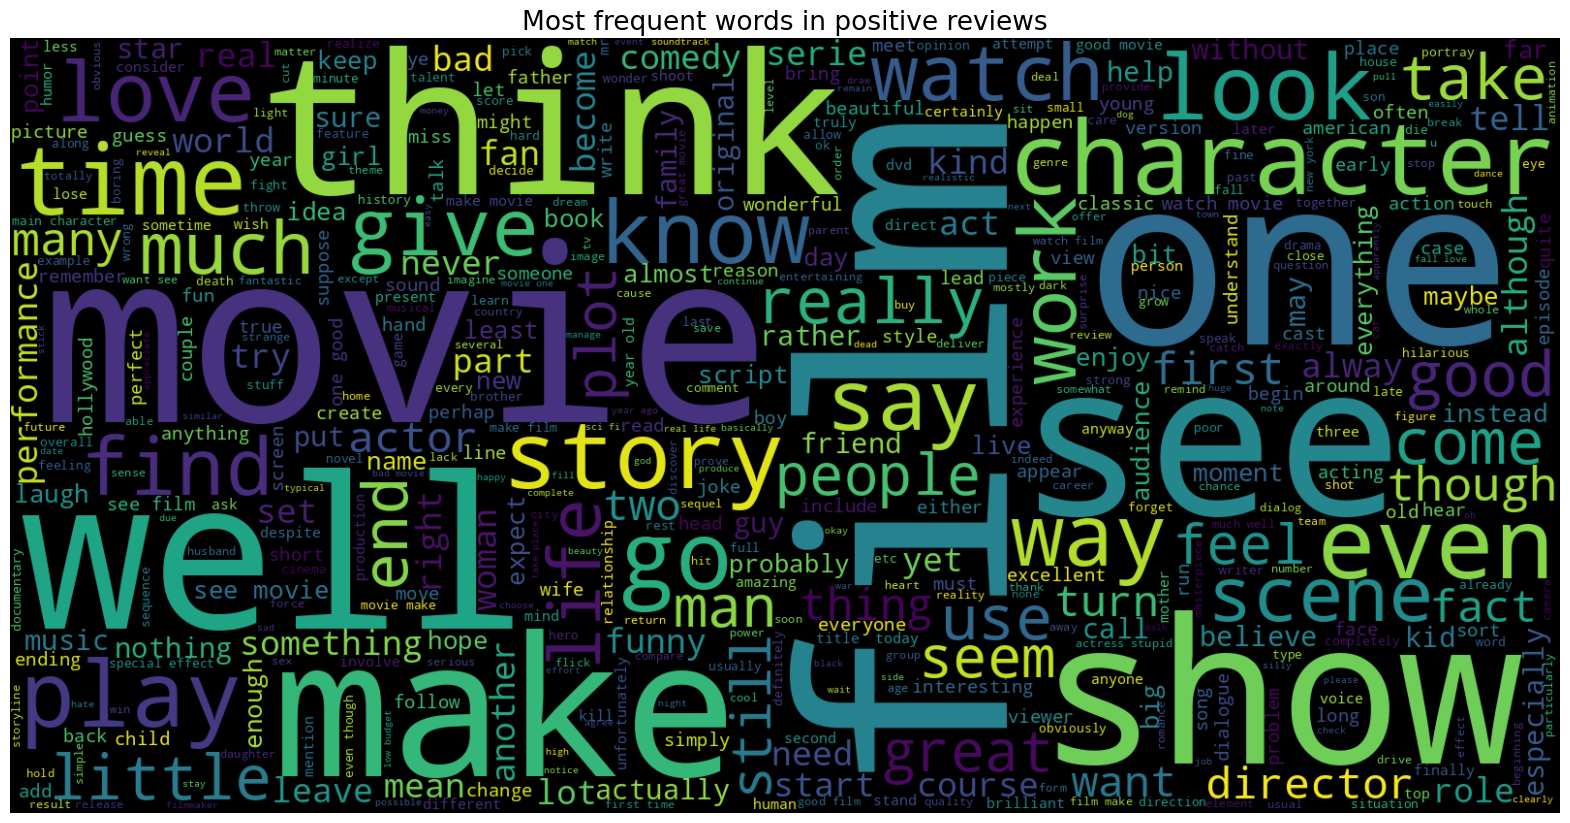

In [ ]:
# visulaizing the most frequent words in positive reviews on the original data before text processing
text = ' '.join([word for word in positive_clean_reviews['clean_reviews']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [ ]:
from collections import Counter
count = Counter()
for text in positive_clean_reviews['clean_reviews'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('I', 130224),
 ('movie', 67739),
 ('film', 66142),
 ('one', 37421),
 ('see', 32880),
 ('good', 31579),
 ('like', 31179),
 ('make', 29584),
 ('well', 25002),
 ('time', 21728),
 ('get', 21051),
 ('would', 20808),
 ('character', 19801),
 ('watch', 18673),
 ('story', 18427)]

In [ ]:
clean_pos_words = pd.DataFrame(count.most_common(15))
clean_pos_words.columns = ['word', 'count']
clean_pos_words.head(15)

word   count
0           I  130224
1       movie   67739
2        film   66142
3         one   37421
4         see   32880
5        good   31579
6        like   31179
7        make   29584
8        well   25002
9        time   21728
10        get   21051
11      would   20808
12  character   19801
13      watch   18673
14      story   18427

In [ ]:
px.bar(clean_pos_words, x='count', y='word', title='Common words in positive reviews', color= 'word')

Finding and visualizing the most frequent words in negative reviews

In [ ]:
negative_clean_reviews = movie_df[movie_df.clean_sentiment_predicted == 0]

In [ ]:
negative_clean_reviews.head()

clean_reviews  \
0   one reviewer mention watch oz episode hook rig...   
3   basically family little boy jake think zombie ...   
8   encourage positive comment film I look forward...   
14  fantastic movie three prisoner become famous o...   
15  kind draw erotic scene realize one amateurish ...   

    number of words in cleaned reviews  clean_sentiment predicted  \
0                                  171                          0   
3                                   66                          0   
8                                   66                          0   
14                                  28                          0   
15                                  72                          0   

    clean_sentiment_predicted  
0                           0  
3                           0  
8                           0  
14                          0  
15                          0

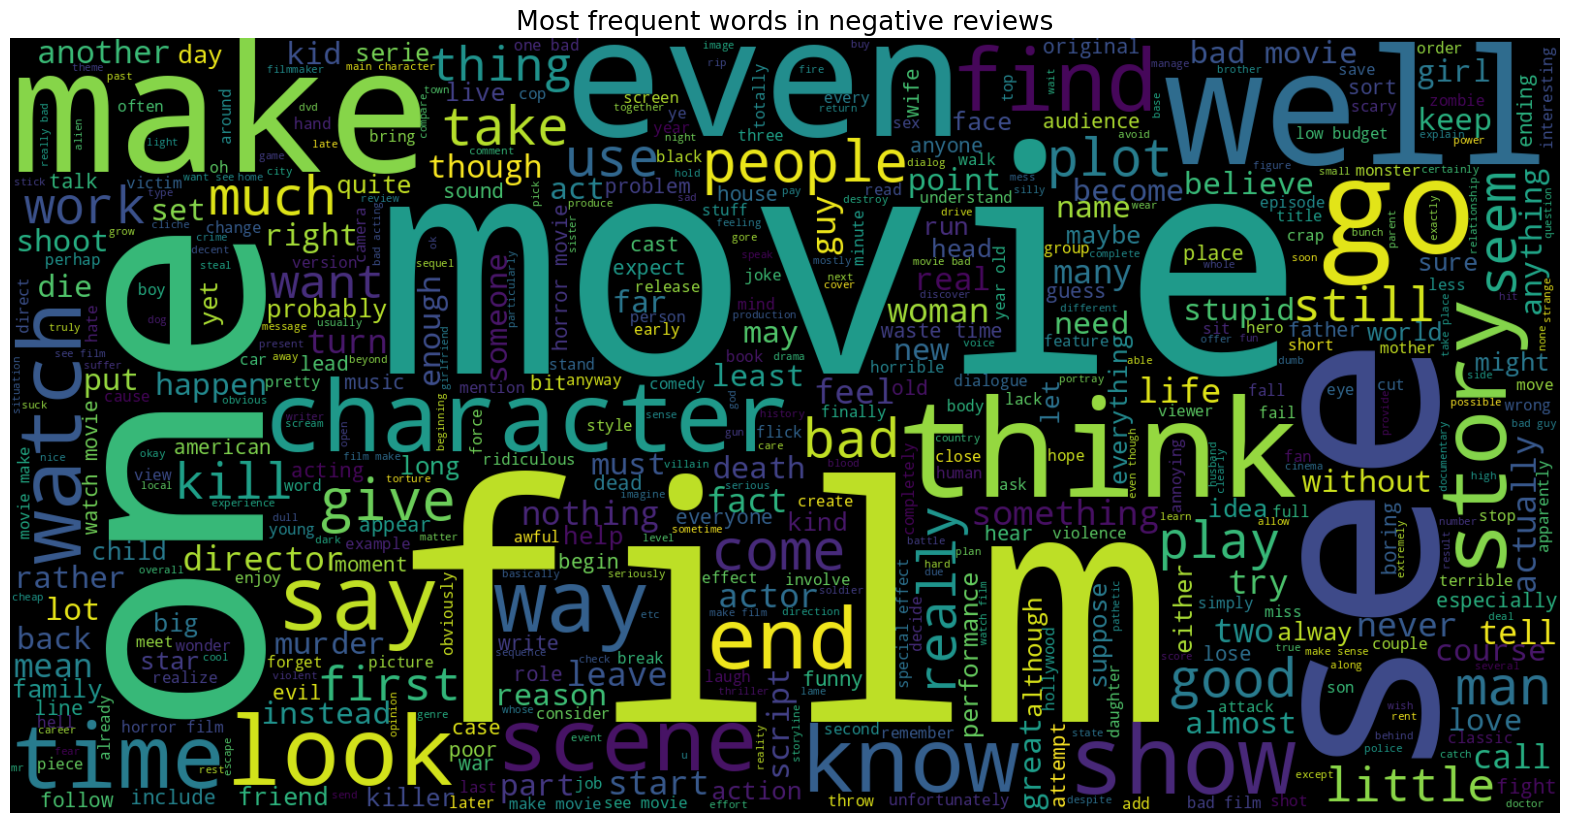

In [ ]:
# visulaizing the most frequent words in positive reviews on the original data before text processing
text = ' '.join([word for word in negative_clean_reviews['clean_reviews']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [ ]:
from collections import Counter
count = Counter()
for text in negative_clean_reviews['clean_reviews'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('I', 55405),
 ('movie', 34272),
 ('film', 28226),
 ('one', 17502),
 ('bad', 15359),
 ('make', 14832),
 ('see', 14233),
 ('like', 12599),
 ('get', 11204),
 ('would', 9967),
 ('go', 9605),
 ('even', 9408),
 ('time', 9218),
 ('good', 9182),
 ('watch', 8607)]

In [ ]:
clean_neg_words = pd.DataFrame(count.most_common(15))
clean_neg_words.columns = ['word', 'count']
clean_neg_words.head(15)

word  count
0       I  55405
1   movie  34272
2    film  28226
3     one  17502
4     bad  15359
5    make  14832
6     see  14233
7    like  12599
8     get  11204
9   would   9967
10     go   9605
11   even   9408
12   time   9218
13   good   9182
14  watch   8607

In [ ]:
px.bar(clean_neg_words, x='count', y='word', title='Common words in negative reviews', color= 'word')


In [129]:
X = movie_df['clean_reviews']

In [130]:
Y = movie_df['clean_sentiment_predicted']

In [131]:
# Splliting the data

In [132]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

TFIDF

In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
XV_train = vectorization.fit_transform(X_train)
XV_test = vectorization.transform(X_test)

In [135]:
print(XV_train.shape)
print(XV_test.shape)

(37182, 84682)
(12395, 84682)


Bags of words model

In [137]:
from sklearn.feature_extraction.text import CountVectorizer
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train=cv.fit_transform(X_train)
#transformed test reviews
cv_test=cv.transform(X_test)

print('BOW_cv_train:',cv_train.shape)
print('BOW_cv_test:',cv_test.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (37182, 5546768)
BOW_cv_test: (12395, 5546768)


In [140]:
print("Size of x_train: ", (X_train.shape))
print("Size of y_train: ", (Y_train.shape))
print("Size of x_test: ", (X_test.shape))
print("Size of y_test: ", (Y_test.shape))

Size of x_train:  (37182,)
Size of y_train:  (37182,)
Size of x_test:  (12395,)
Size of y_test:  (12395,)


In [182]:
# values in Y_test
count = 0   # represent no of 1's present
count1 = 0
for i in Y_test:
  if i == 1:
    count = count +1
  else:
    count1 = count1 + 1

print(count)
print(count1)

8500
3895


ML Algorithms

In [141]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import os

import warnings
warnings.filterwarnings('ignore')

In [151]:
# Logistic Regression tfidf
logreg = LogisticRegression()
logreg.fit(XV_train, Y_train)
logreg_pred = logreg.predict(XV_test)
logreg_acc = accuracy_score(logreg_pred, Y_test)
print("Test accuracy using tfidf: {:.2f}%".format(logreg_acc*100))

Test accuracy using tfidf: 89.27%


------------------------------------------------Accuracy Score---------------------------------
Test accuracy using Bag of Words model : 89.27%
------------------------------------------------Classification Report---------------------------
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      3895
           1       0.89      0.96      0.92      8500

    accuracy                           0.89     12395
   macro avg       0.89      0.85      0.87     12395
weighted avg       0.89      0.89      0.89     12395

------------------------------------------------Confusion Matrix---------------------------------


<Axes: >

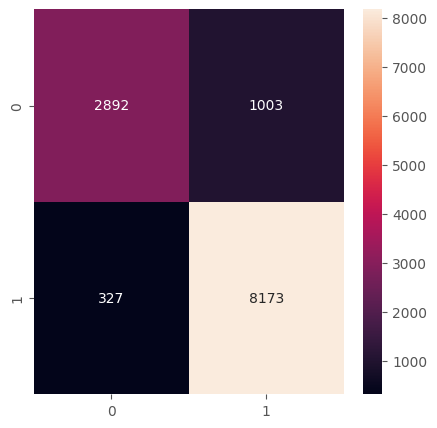

In [164]:
print("------------------------------------------------Accuracy Score---------------------------------")
logreg_acc = accuracy_score(Y_test,logreg_pred)
print("Test accuracy using Bag of Words model : {:.2f}%".format(logreg_acc*100))
print("------------------------------------------------Classification Report---------------------------")
print(classification_report(Y_test, logreg_pred))
print("------------------------------------------------Confusion Matrix---------------------------------")
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(Y_test, logreg_pred), annot = True,  fmt = 'd')

In [181]:
# values in LR tfidf
count = 0
count1 = 0
for i in logreg_pred:
  if i == 1:
    count = count +1
  else:
    count1 = count1 + 1

print(count)
print(count1)


9176
3219


In [ ]:
### LOGISTIC Regression using BAg of words model

In [147]:
#Logistic regression BOW model
#lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
lr=LogisticRegression()
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train,Y_train)



In [148]:
lr_bow_predict=lr.predict(cv_test)

------------------------------------------------Accuracy Score---------------------------------
Test accuracy using Bag of Words model : 68.62%
------------------------------------------------Classification Report---------------------------
              precision    recall  f1-score   support

           0       0.88      0.00      0.00      3895
           1       0.69      1.00      0.81      8500

    accuracy                           0.69     12395
   macro avg       0.78      0.50      0.41     12395
weighted avg       0.75      0.69      0.56     12395

------------------------------------------------Confusion Matrix---------------------------------


<Axes: >

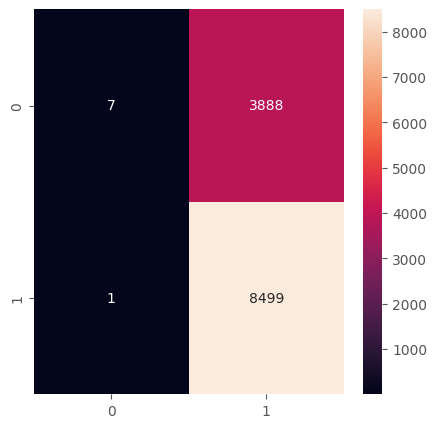

In [163]:

print("------------------------------------------------Accuracy Score---------------------------------")
logreg_acc_bow = accuracy_score(lr_bow_predict, Y_test)
print("Test accuracy using Bag of Words model : {:.2f}%".format(logreg_acc_bow*100))
print("------------------------------------------------Classification Report---------------------------")
print(classification_report(Y_test, lr_bow_predict))
print("------------------------------------------------Confusion Matrix---------------------------------")
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(Y_test, lr_bow_predict), annot = True,  fmt = 'd')

In [180]:
# values in LR bow classifer
count = 0
count1 = 0
for i in lr_bow_predict:
  if i == 1:
    count = count +1
  else:
    count1 = count1 + 1

print(count)
print(count1)


12387
8


Stochastic Gradient Classifier

In [166]:
#TFIDF
sgd_tfidf=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
sgd_tfidf.fit(XV_train,Y_train)
sgd_tfidf_pred = sgd_tfidf.predict(XV_test)
sgd_tfidf_acc = accuracy_score(Y_test, sgd_tfidf_pred)
print("Test accuracy using tfidf: {:.2f}%".format(sgd_tfidf_acc*100))


Test accuracy using tfidf: 88.60%


------------------------------------------------Accuracy Score---------------------------------
Test accuracy using Bag of Words model : 88.60%
------------------------------------------------Classification Report---------------------------
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      3895
           1       0.88      0.96      0.92      8500

    accuracy                           0.89     12395
   macro avg       0.89      0.84      0.86     12395
weighted avg       0.89      0.89      0.88     12395

------------------------------------------------Confusion Matrix---------------------------------


<Axes: >

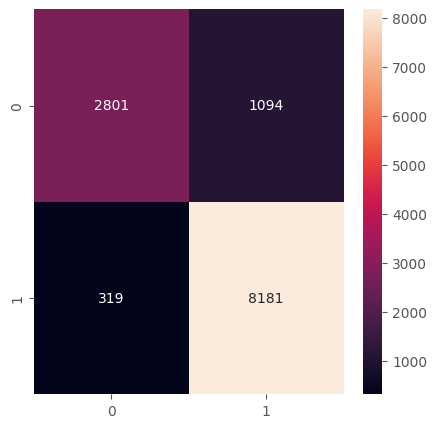

In [172]:
print("------------------------------------------------Accuracy Score---------------------------------")
sgd_tfidf_acc = accuracy_score(Y_test, sgd_tfidf_pred)
print("Test accuracy using Bag of Words model : {:.2f}%".format(sgd_tfidf_acc*100))
print("------------------------------------------------Classification Report---------------------------")
print(classification_report(Y_test, sgd_tfidf_pred))
print("------------------------------------------------Confusion Matrix---------------------------------")
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(Y_test, sgd_tfidf_pred), annot = True,  fmt = 'd')

In [171]:
#Bag of words model
sgd_bow=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
sgd_bow.fit(cv_train,Y_train)
sgd_bow_pred = sgd_bow.predict(cv_test)
sgd_bow_acc = accuracy_score(Y_test, sgd_bow_pred)
print("Test accuracy using Bag of words model: {:.2f}%".format(sgd_bow_acc*100))


Test accuracy using Bag of words model: 68.70%


------------------------------------------------Accuracy Score---------------------------------
Test accuracy using Bag of Words model : 68.70%
------------------------------------------------Classification Report---------------------------
              precision    recall  f1-score   support

           0       0.83      0.00      0.01      3895
           1       0.69      1.00      0.81      8500

    accuracy                           0.69     12395
   macro avg       0.76      0.50      0.41     12395
weighted avg       0.73      0.69      0.56     12395

------------------------------------------------Confusion Matrix---------------------------------


<Axes: >

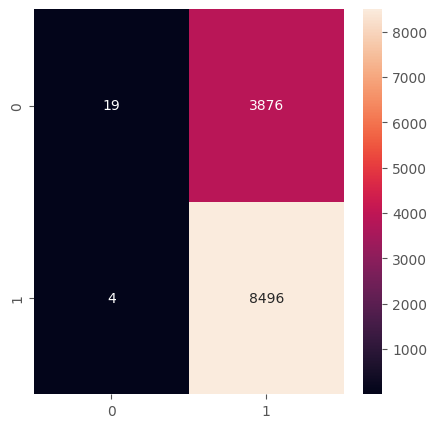

In [173]:
print("------------------------------------------------Accuracy Score---------------------------------")
sgd_bow_acc = accuracy_score(Y_test, sgd_bow_pred)
print("Test accuracy using Bag of Words model : {:.2f}%".format(sgd_bow_acc*100))
print("------------------------------------------------Classification Report---------------------------")
print(classification_report(Y_test, sgd_bow_pred))
print("------------------------------------------------Confusion Matrix---------------------------------")
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(Y_test, sgd_bow_pred), annot = True,  fmt = 'd')

In [174]:
print(sgd_bow_pred)

[1 1 1 ... 1 1 1]


In [175]:
print(sgd_tfidf_pred)

[1 1 1 ... 1 1 1]


In [177]:
# values in SGD classifer
count = 0
count1 = 0
for i in sgd_tfidf_pred:
  if i == 1:
    count = count +1
  else:
    count1 = count1 + 1

print(count)
print(count1)


9275
3120


In [178]:
# values in Y_test
count = 0   # represent no of 1's present
count1 = 0
for i in Y_test:
  if i == 1:
    count = count +1
  else:
    count1 = count1 + 1

print(count)
print(count1)

8500
3895


In [179]:
# values in SGD classifer
count = 0
count1 = 0
for i in sgd_bow_pred:
  if i == 1:
    count = count +1
  else:
    count1 = count1 + 1

print(count)
print(count1)


12372
23


In [ ]:
# Multinomial NB

In [185]:
# TFIDF
mnb = MultinomialNB()
mnb.fit(XV_train, Y_train)
mnb_pred = mnb.predict(XV_test)
mnb_acc = accuracy_score(Y_test,mnb_pred)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 69.22%


------------------------------------------------Accuracy Score---------------------------------
Test accuracy using Bag of Words model : 69.22%
------------------------------------------------Classification Report---------------------------
              precision    recall  f1-score   support

           0       0.95      0.02      0.04      3895
           1       0.69      1.00      0.82      8500

    accuracy                           0.69     12395
   macro avg       0.82      0.51      0.43     12395
weighted avg       0.77      0.69      0.57     12395

------------------------------------------------Confusion Matrix---------------------------------


<Axes: >

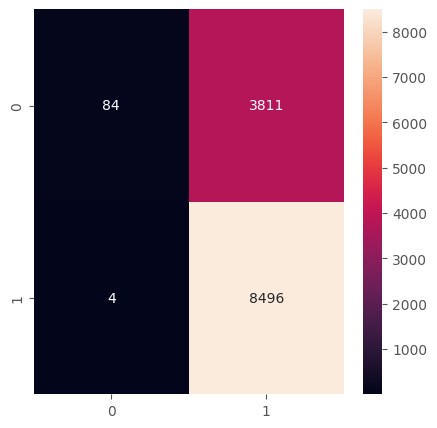

In [186]:
print("------------------------------------------------Accuracy Score---------------------------------")
mnb_acc = accuracy_score(Y_test, mnb_pred)
print("Test accuracy using Bag of Words model : {:.2f}%".format(mnb_acc*100))
print("------------------------------------------------Classification Report---------------------------")
print(classification_report(Y_test, mnb_pred))
print("------------------------------------------------Confusion Matrix---------------------------------")
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(Y_test, mnb_pred), annot = True,  fmt = 'd')

In [189]:
# BOW model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train, Y_train)
mnb_bow_predict=mnb.predict(cv_test)
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(Y_test,mnb_bow_predict)
print("Test accuracy: {:.2f}%".format(mnb_bow_score*100))

Test accuracy: 68.07%


------------------------------------------------Accuracy Score---------------------------------
Test accuracy using Bag of Words model : 68.07%
------------------------------------------------Classification Report---------------------------
              precision    recall  f1-score   support

           0       0.49      0.54      0.52      3895
           1       0.78      0.75      0.76      8500

    accuracy                           0.68     12395
   macro avg       0.64      0.64      0.64     12395
weighted avg       0.69      0.68      0.68     12395

------------------------------------------------Confusion Matrix---------------------------------


<Axes: >

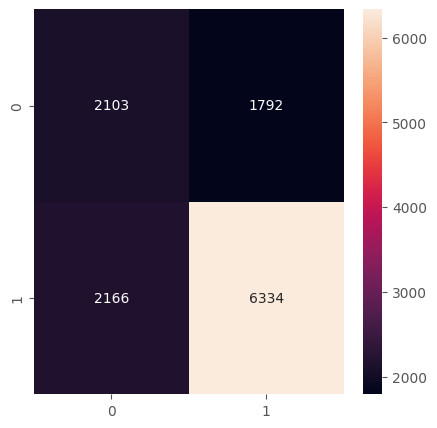

In [190]:
print("------------------------------------------------Accuracy Score---------------------------------")
mnb_acc = accuracy_score(Y_test, mnb_bow_predict)
print("Test accuracy using Bag of Words model : {:.2f}%".format(mnb_bow_score*100))
print("------------------------------------------------Classification Report---------------------------")
print(classification_report(Y_test, mnb_bow_predict))
print("------------------------------------------------Confusion Matrix---------------------------------")
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(Y_test, mnb_bow_predict), annot = True,  fmt = 'd')